<a href="https://colab.research.google.com/github/HoanDiep/BT10_tuan11/blob/main/food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
folder = '/content/drive/My Drive/Colab Notebooks/food/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('banh_can'):
    output = 0
  elif file.startswith('banh_mi'):
    output = 1
  elif file.startswith('banh_pia'):
    output = 2
  elif file.startswith('banh_trang_nuong'):
    output = 3
  elif file.startswith('banh_xeo'):
    output = 4
  elif file.startswith('bun_dau'):
    output = 5
  elif file.startswith('ca_kho'):
    output = 6
  elif file.startswith('com_tam'):
    output = 7
  elif file.startswith('nem_chua'):
    output = 8
  elif file.startswith('pho'):
    output = 9
  else:
    continue
  photo = load_img(folder + file, target_size=(30, 40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
save('photos.npy', photos)
save('labels.npy', labels)

In [3]:
!cp photos.npy "/content/drive/My Drive/Colab Notebooks/dataset_food"
!cp labels.npy "/content/drive/My Drive/Colab Notebooks/dataset_food"

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
photos = np.load('/content/drive/My Drive/Colab Notebooks/dataset_food/photos.npy')
labels = np.load('/content/drive/My Drive/Colab Notebooks/dataset_food/labels.npy')

x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.1)

In [5]:
x_train.shape


(5128, 30, 40, 3)

In [6]:
x_test.shape

(570, 30, 40, 3)

In [7]:
x_train = x_train.reshape(5128, 30, 40, 3)
x_test = x_test.reshape(570, 30, 40, 3)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [8]:
labelsFood = ['banh_can','banh_mi','banh_pia','banh_trang_nuong','banh_xeo','bun_dau','ca_kho','com_tam','nem_chua','pho']

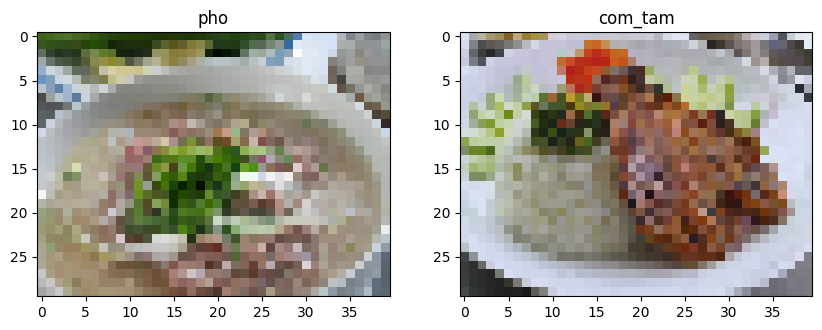

In [9]:
from matplotlib import pyplot as plt
# Plot the first two images of the training set
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(x_train[0], cmap='gray')
plt.title("{}".format(labelsFood[y_train[0]]))
plt.subplot(122)
plt.imshow(x_test[20], cmap='gray')
plt.title("{}".format(labelsFood[y_test[20]]))
plt.show()

In [10]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, LeakyReLU, Dropout

model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='linear', input_shape=(30, 40, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=3, activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=3, activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 28, 38, 32)        896       
                                                                 
 leaky_re_lu_42 (LeakyReLU)  (None, 28, 38, 32)        0         
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 14, 19, 32)       0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 14, 19, 32)        0         
                                                                 
 conv2d_40 (Conv2D)          (None, 14, 19, 64)        18496     
                                                                 
 leaky_re_lu_43 (LeakyReLU)  (None, 14, 19, 64)        0         
                                                      

In [16]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
model.fit(x_train, y_train, batch_size=64, epochs=100, verbose=1)

Epoch 1/100
81/81 [==============================] - 10s 14ms/step - loss: 2.1989 - accuracy: 0.1847
Epoch 2/100
81/81 [==============================] - 1s 7ms/step - loss: 1.9643 - accuracy: 0.3056
Epoch 3/100
81/81 [==============================] - 1s 7ms/step - loss: 1.7809 - accuracy: 0.3672
Epoch 4/100
81/81 [==============================] - 1s 7ms/step - loss: 1.6557 - accuracy: 0.4238
Epoch 5/100
81/81 [==============================] - 1s 7ms/step - loss: 1.5329 - accuracy: 0.4723
Epoch 6/100
81/81 [==============================] - 1s 7ms/step - loss: 1.4082 - accuracy: 0.5281
Epoch 7/100
81/81 [==============================] - 1s 7ms/step - loss: 1.2983 - accuracy: 0.5636
Epoch 8/100
81/81 [==============================] - 1s 7ms/step - loss: 1.2252 - accuracy: 0.6002
Epoch 9/100
81/81 [==============================] - 1s 7ms/step - loss: 1.1826 - accuracy: 0.6020
Epoch 10/100
81/81 [==============================] - 1s 7ms/step - loss: 1.0667 - accuracy: 0.6416
Epoch 1

In [18]:
test_loss,test_acc=model.evaluate(x_test,y_test)

print('test_acc:',test_acc)
print('test_loss:',test_loss)

18/18 [==============================] - 1s 10ms/step - loss: 1.5165 - accuracy: 0.7018
test_acc: 0.7017543911933899
test_loss: 1.5164722204208374


In [19]:
model.save('/content/drive/My Drive/Colab Notebooks/food.h5')

1/1 [==============================] - 0s 269ms/step
banh_xeo


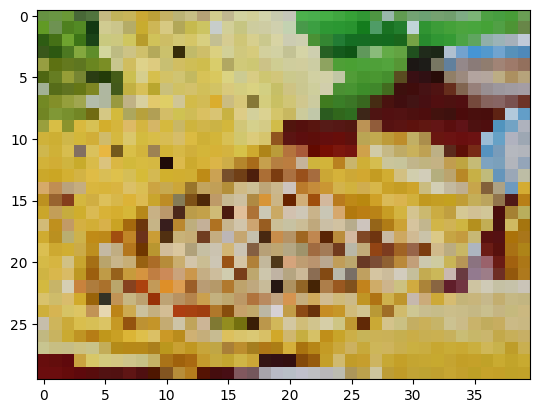

In [20]:

img = load_img('/content/drive/My Drive/Colab Notebooks/banhxeo.jpg',target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 30, 40, 3)
img = img.astype('float32') / 255
result = labelsFood[np.argmax(model.predict(img))]
print(result)

1/1 [==============================] - 0s 22ms/step
banh_mi


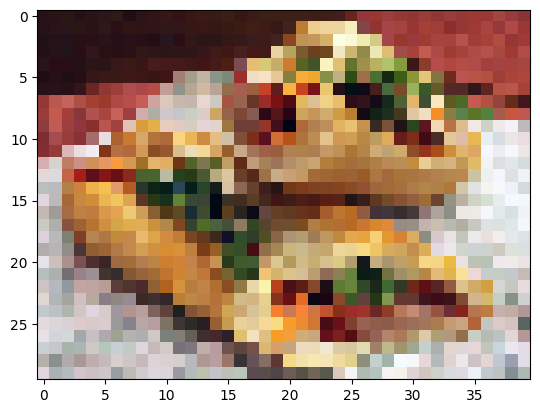

In [28]:
img = load_img('/content/drive/My Drive/Colab Notebooks/banhmi.jpg',target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 30, 40, 3)
img = img.astype('float32') / 255
result = labelsFood[np.argmax(model.predict(img))]
print(result)